<a href="https://colab.research.google.com/github/kanekiken1234/TFI_Restaurant_Revenue_Prediction/blob/main/TFI_Revenue_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 

>File descriptions
train.csv - the training set. Use this dataset for training your model. 
test.csv - the test set. To deter manual "guess" predictions, Kaggle has supplemented the test set with additional "ignored" data. These are not counted in the scoring.
sampleSubmission.csv - a sample submission file in the correct format
Data fields


* Id : Restaurant id. 
* Open Date : opening date for a restaurant
*City : City that the restaurant is in. Note that there are unicode in the names. 
*City Group: Type of the city. Big cities, or Other. 
*Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
*P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
*Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [169]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [170]:
!kaggle competitions download -c restaurant-revenue-prediction

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [171]:
!mkdir train
!unzip train.csv.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  train.csv.zip
replace train/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/train.csv         


In [172]:
!mkdir test
!unzip test.csv.zip -d test

mkdir: cannot create directory ‘test’: File exists
Archive:  test.csv.zip
replace test/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test/test.csv           


In [173]:
import pandas as pd 

train_data = pd.read_csv('/content/train/train.csv',index_col=0)
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


#1. Exploratory Data Analysis

In [174]:
train_data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [175]:
train_data.shape

(137, 42)

In [176]:
train_data.columns

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [177]:
train_data.dtypes

Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

There are mainly 2 categorical variables namely : 
> * City Group  
> *Type (Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile)

And 37 Numerical variables (discrete)
> * P1 to P37

In [178]:
# lets check which city has maximum number of restaurants
train_data["City"].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Samsun             5
Bursa              5
Antalya            4
Sakarya            4
Kayseri            3
Tekirdağ           3
Diyarbakır         3
Eskişehir          3
Adana              3
Konya              2
Muğla              2
Trabzon            2
Aydın              2
Afyonkarahisar     1
Kütahya            1
Balıkesir          1
Kocaeli            1
Osmaniye           1
Denizli            1
Kastamonu          1
Isparta            1
Elazığ             1
Şanlıurfa          1
Bolu               1
Tokat              1
Gaziantep          1
Uşak               1
Edirne             1
Amasya             1
Karabük            1
Kırklareli         1
Name: City, dtype: int64

> Istanbul has Maximum number of restaurants = 50


 Visualizing the data for finding some insights

In [179]:
import matplotlib.pyplot as plt

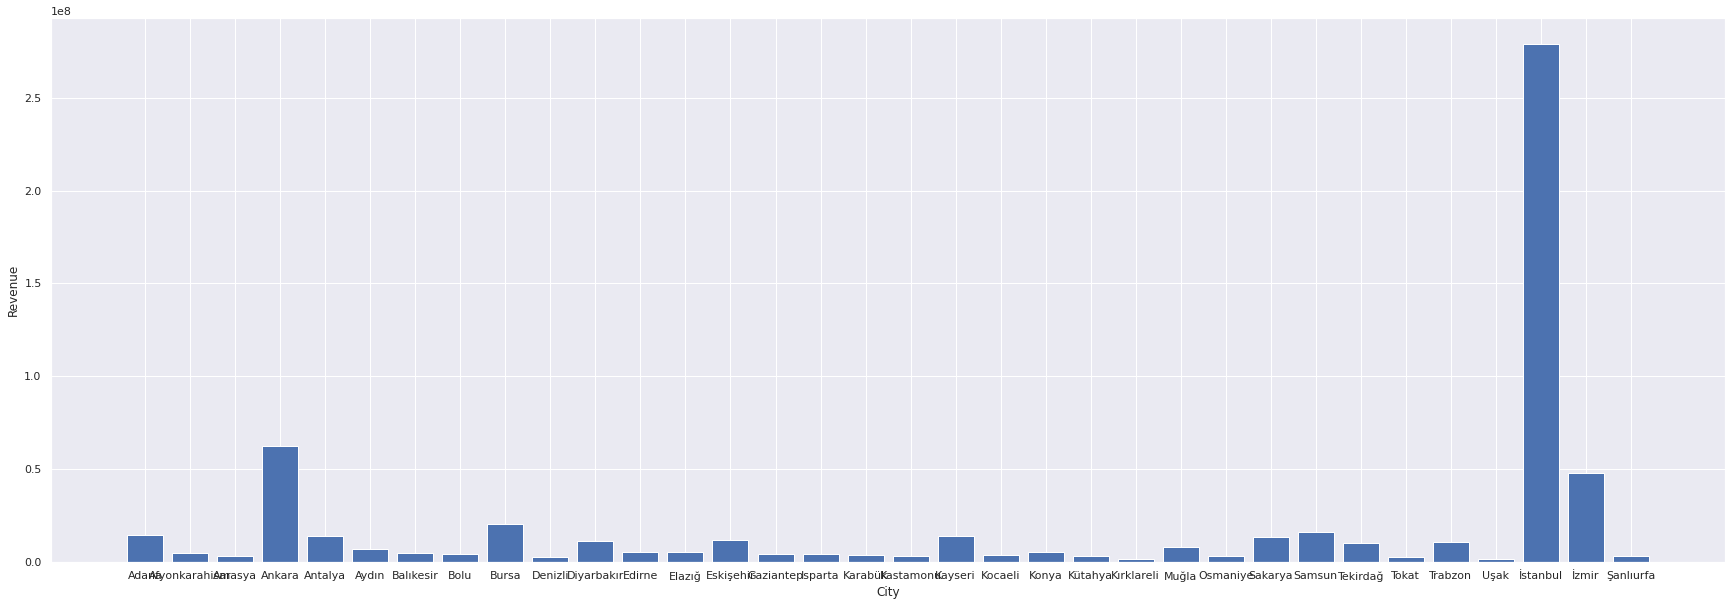

In [180]:
# lets check how city affects our revenue feature
plt.subplots(figsize=(30,10))
city_revenue_group = train_data["revenue"].groupby(train_data["City"])
agg_data = city_revenue_group.sum()
x_axis = agg_data.index
y_axis = agg_data
plt.bar(x_axis,y_axis)
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()

>Istanbul is mainly generating exceptionally high revenue as compared to other cities

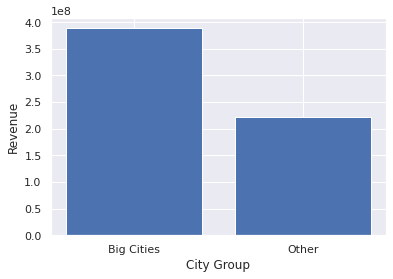

In [181]:
# lets check how city groups affects our revenue feature
city_group_revenue_group = train_data["revenue"].groupby(train_data["City Group"])
agg_data = city_group_revenue_group.sum()
x_axis = agg_data.index
y_axis = agg_data
plt.bar(x_axis,y_axis)
plt.xlabel("City Group")
plt.ylabel("Revenue")
plt.show()

>Restaurants in  Big Cities are generating  higher revenue


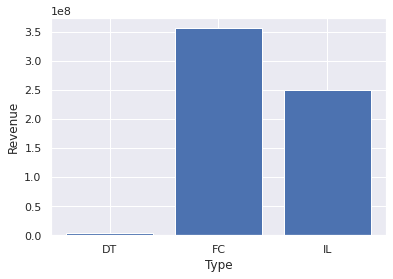

In [182]:
# lets check how Type affects our revenue feature
type_revenue_group = train_data["revenue"].groupby(train_data["Type"])
agg_data = type_revenue_group.sum()
x_axis = agg_data.index
y_axis = agg_data
plt.bar(x_axis,y_axis)
plt.xlabel("Type")
plt.ylabel("Revenue")
plt.show()

> * FC Type is generating maximum revenue.
> *IL closly competing with FC type
> *DT is almost generating insignificant amount of revenue.
> *MB Feature is not present at all

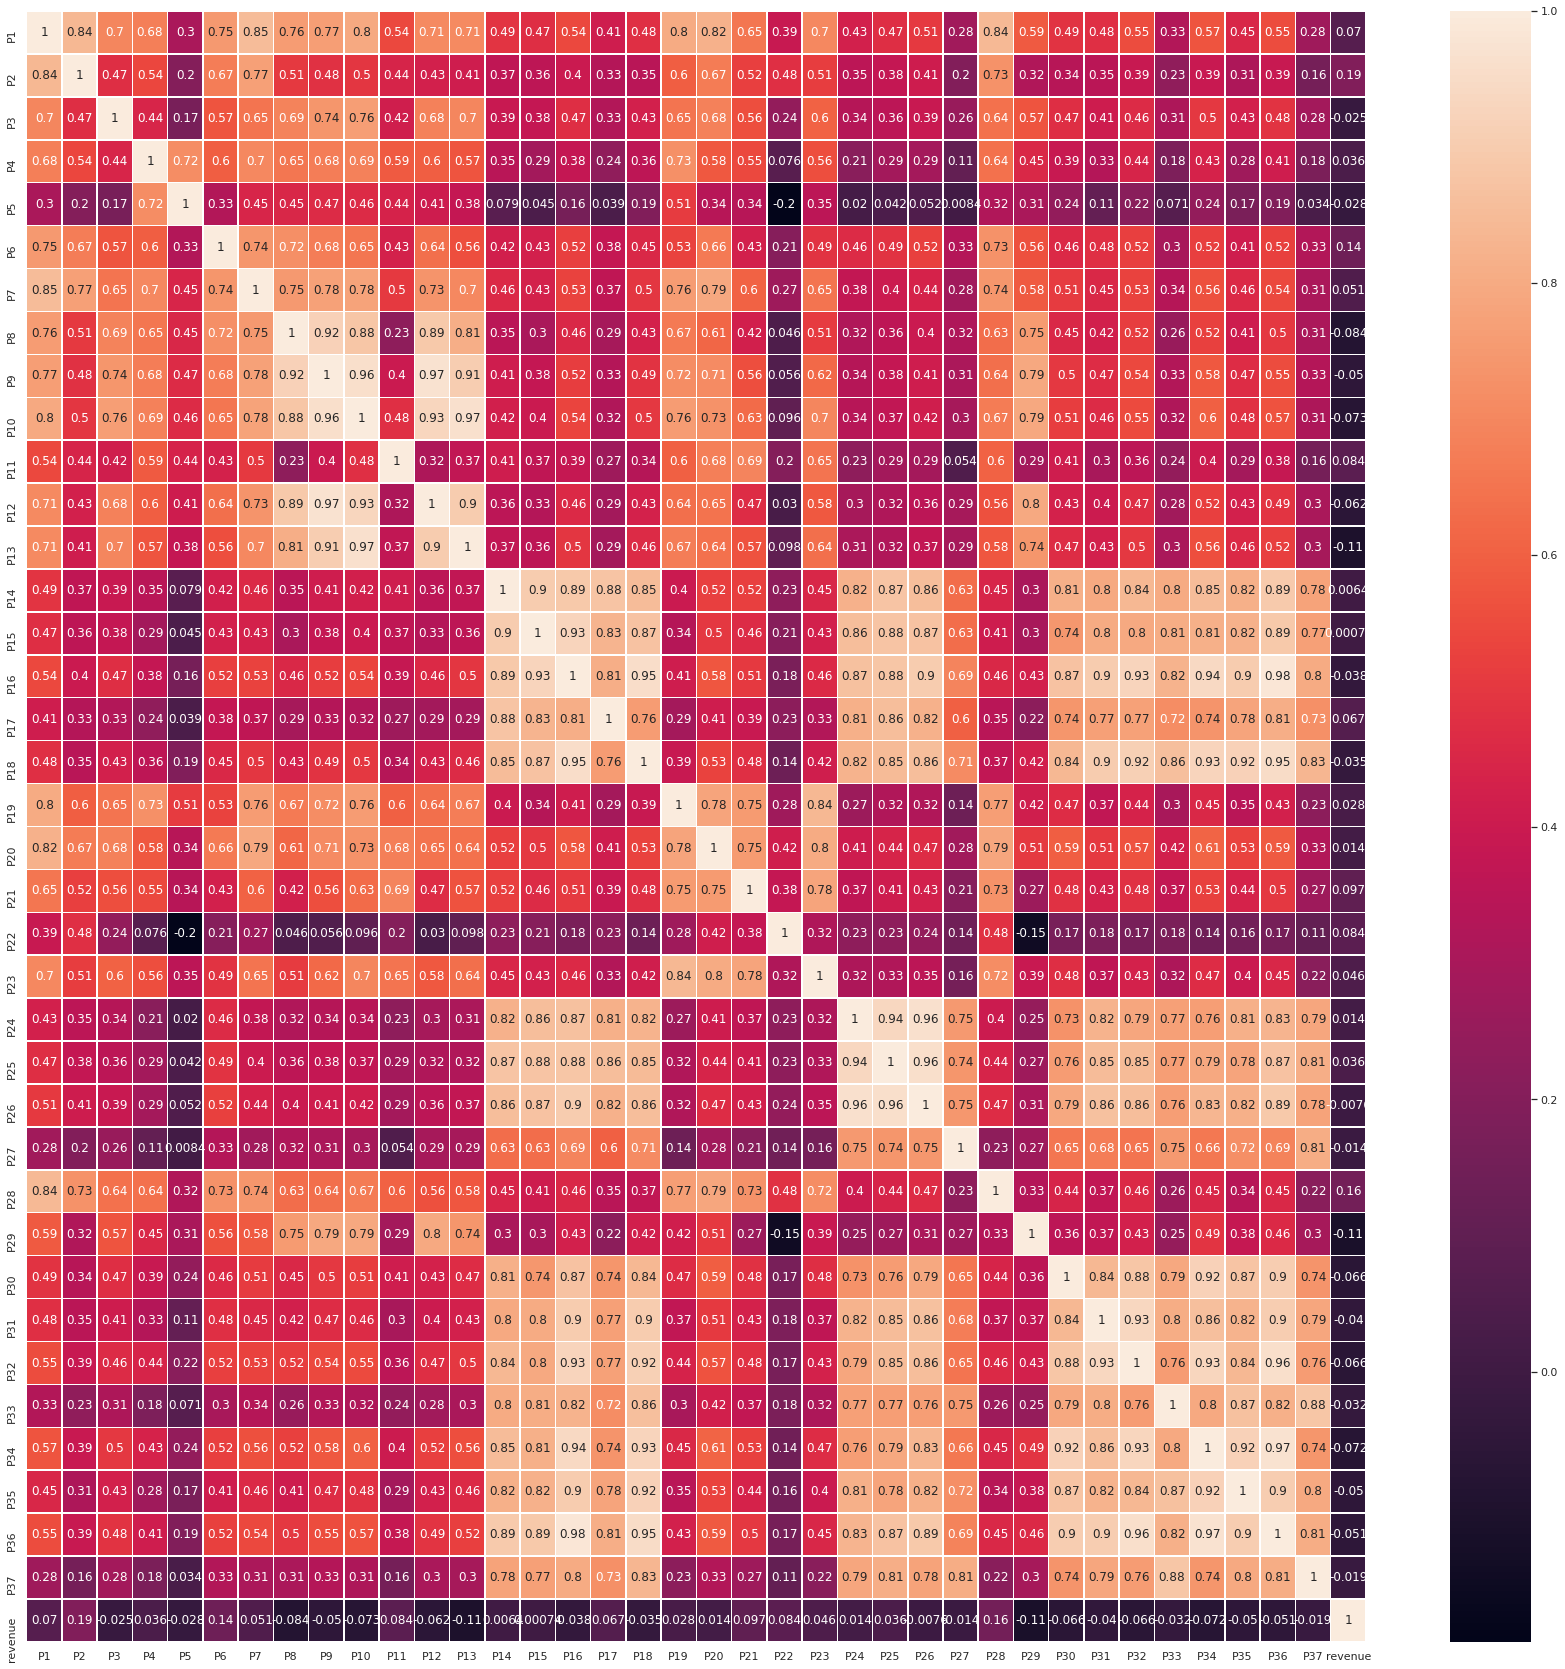

In [183]:
# visualizing remaining features , looking for correlation between them
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
fig, ax = plt.subplots(figsize=(30,30)) 
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix,annot=True,linewidths=.5,ax=ax)

We can see that there is a high correlation among some feature

Lets find VIF of the features:

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# exluding revenue from VIF calculation because it's variable to be predicted
features=train_data.loc[:,"P1":"P37"]
vif_data = pd.DataFrame()
vif_data["features"] = features.columns
vif_data["vif"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
vif_data = vif_data.sort_values(by=["vif"])
vif_data

,features,vif
26,P27,6.081736
21,P22,10.407782
22,P23,11.974084
20,P21,13.429555
16,P17,14.309431
36,P37,15.212918
4,P5,16.739122
32,P33,17.065986
5,P6,18.068385
10,P11,22.129576


We can see that there exits high multicollinearity in our data.
* We don't know what is the source of this data in this case. Data in columns P1 - P37 is divided in three categories of ***`obfuscated data.`***
>* Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales.
>* Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability.
>* Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.


**Since the data in obfuscated, we can't clearly identify change in which feature brings a change in revenue.**


By Observing the Heat Map we can say that P2, P6 and P28 have a signicant correlation with revenue as compared to others

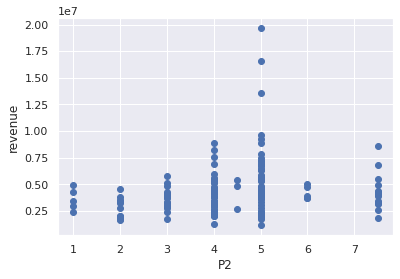

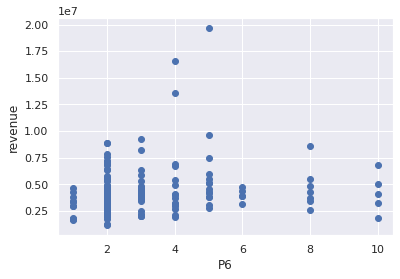

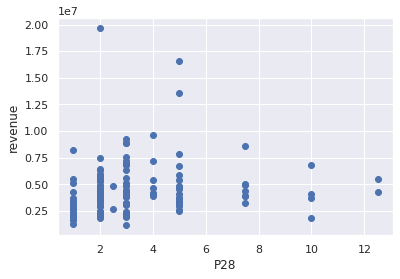

In [185]:
#Let check correlation between P2-revenue,P6-revenue,P28-revenue 
plt.figure(1)
plt.xlabel("P2")
plt.ylabel("revenue")
plt.scatter(train_data["P2"],train_data["revenue"])
plt.figure(2)
plt.xlabel("P6")
plt.ylabel("revenue")
plt.scatter(train_data["P6"],train_data["revenue"])
plt.figure(3)
plt.xlabel("P28")
plt.ylabel("revenue")
plt.scatter(train_data["P28"],train_data["revenue"])


# 2. Data Preprocessing 

As we have seen above "Istanbul" is the only city that has maximum number of restaurants. Most of the other restaurants have significantly less number of restaurants. We can't have one hot encoding for each and every city, it will make so many features

So I will divide the city restaurants into different groups 
> * All cities having more than 3 restaurants will have individual group 
> * Rest all with be put under the group "other".

In [186]:
# cities with no. of restaurants > 3
train_data["City"].value_counts() > 3

İstanbul           True
Ankara             True
İzmir              True
Samsun             True
Bursa              True
Antalya            True
Sakarya            True
Kayseri           False
Tekirdağ          False
Diyarbakır        False
Eskişehir         False
Adana             False
Konya             False
Muğla             False
Trabzon           False
Aydın             False
Afyonkarahisar    False
Kütahya           False
Balıkesir         False
Kocaeli           False
Osmaniye          False
Denizli           False
Kastamonu         False
Isparta           False
Elazığ            False
Şanlıurfa         False
Bolu              False
Tokat             False
Gaziantep         False
Uşak              False
Edirne            False
Amasya            False
Karabük           False
Kırklareli        False
Name: City, dtype: bool

* İstanbul 
* Ankara   
* İzmir    
* Samsun   
* Bursa    
* Sakarya  
* Antalya  
will be encoded as individual columns , rest will be put in "others group"

In [187]:
# one hot encoding all the major cities (where no. of restaurants are more than 3)
city_encodings = pd.get_dummies(train_data[["City"]], prefix = ['City'])
city_encodings["City_Other"] = 0
for index, rows in city_encodings.iterrows():
    if (rows["City_İstanbul"] == 0 and rows["City_Ankara"] == 0 and rows["City_İzmir"] == 0 and rows["City_Bursa"] == 0 and rows["City_Samsun"] == 0 and rows["City_Antalya"] == 0 and rows["City_Sakarya"] == 0):
        city_encodings["City_Other"][index] = 1

# chosing essential groups i.e [Cities with no. of restaurants > 3 and Other (with no. of restaurants < 3)] 
city_encodings = city_encodings[["City_İstanbul", "City_Ankara", "City_İzmir", "City_Bursa", "City_Samsun", "City_Antalya", "City_Sakarya", "City_Other"]]
city_encodings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other
Id,,,,,,,,
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
132,0,0,0,0,0,0,0,1
133,0,0,1,0,0,0,0,0
134,0,0,0,0,0,0,0,1


In [188]:
train_data = pd.merge(train_data, city_encodings, left_index = True, right_index = True)

In [189]:
train_data.drop(["City"],axis=1,inplace=True)
train_data.head()

,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1,0,0,0,0,0,0,0
1,02/14/2008,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0,1,0,0,0,0,0,0
2,03/09/2013,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0,0,0,0,0,0,0,1
3,02/02/2012,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0,0,0,0,0,0,0,1
4,05/09/2009,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0,0,0,0,0,0,0,1


After grouping Cities, lets group City Group feature

In [190]:
# one hot encoding City Groups
city_group_encodings = pd.get_dummies(train_data[["City Group"]], prefix = ['City Group'])
city_group_encodings

,City Group_Big Cities,City Group_Other
Id,,
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
132,0,1
133,1,0
134,0,1


In [191]:
train_data = pd.merge(train_data, city_group_encodings, left_index = True, right_index = True)

In [192]:
train_data.drop(["City Group"], axis=1,inplace=True)

In [193]:
train_data.head()

,Open Date,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other,City Group_Big Cities,City Group_Other
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1,0,0,0,0,0,0,0,1,0
1,02/14/2008,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0,1,0,0,0,0,0,0,1,0
2,03/09/2013,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0,0,0,0,0,0,0,1,0,1
3,02/02/2012,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0,0,0,0,0,0,0,1,0,1
4,05/09/2009,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0,0,0,0,0,0,0,1,0,1


After grouping Cities, lets group Type feature

> Since there is no MB feature and very less DT feature values. Lets combine them and make them one as "Other_Type"

In [197]:
type_encodings = pd.get_dummies(train_data[["Type"]], prefix = ['Type'])
type_encodings["Type_Other"] = 0
for index, rows in type_encodings.iterrows():
    if (rows["Type_DT"] == 0 and rows["Type_FC"] == 0):
        type_encodings["Type_Other"][index] = 1
type_encodings = type_encodings[["Type_DT","Type_FC","Type_Other"]]
type_encodings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Type_DT,Type_FC,Type_Other
Id,,,
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
132,0,1,0
133,0,1,0
134,0,1,0


In [198]:
train_data = pd.merge(train_data, type_encodings, left_index = True, right_index = True)

In [199]:
train_data.drop(["Type"],axis=1,inplace=True)

In [200]:
train_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_Other
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,02/14/2008,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,03/09/2013,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,02/02/2012,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,05/09/2009,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [201]:
#removing open date
train_data.drop(["Open Date"],axis=1,inplace=True)

In [202]:
train_data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_Other
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [203]:
# treating obfuscated data 
# keeping P2,P6 and P28 and removing rest all unnecesasry features from train_data
train_data.drop(["P1","P3","P4","P5","P7",	"P8",	"P9",	"P10",	"P11",	"P12",	"P13",	"P14",	"P15",	"P16",	"P17",	"P18",	"P19",	"P20",	"P21",	"P22",	"P23",	"P24",	"P25","P26","P27","P29",	"P30",	"P31",	"P32",	"P33",	"P34",	"P35",	"P36",	"P37"],axis=1,inplace=True)

In [204]:
train_data.head()

,P2,P6,P28,revenue,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_Other
Id,,,,,,,,,,,,,,,,,
0,5.0,2,2.0,5653753.0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,5.0,2,3.0,6923131.0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,4.0,3,1.0,2055379.0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,4.5,4,2.5,2675511.0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,4.0,2,1.0,4316715.0,0,0,0,0,0,0,0,1,0,1,0,0,1


>from the scatter plots above we had observed there were outliers in the data. Revenue above 1.25 * 10^7  in all the 3 graphs were the outliers. 

In [205]:
train_data[train_data["revenue"] > 12500000].index

Int64Index([16, 75, 99], dtype='int64', name='Id')

In [206]:
train_data.drop(train_data[train_data["revenue"] > 12500000].index, inplace=True)

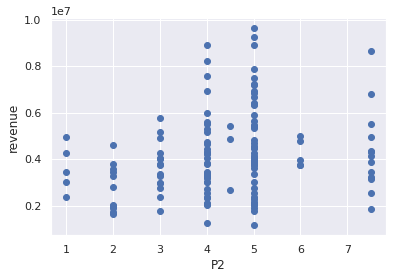

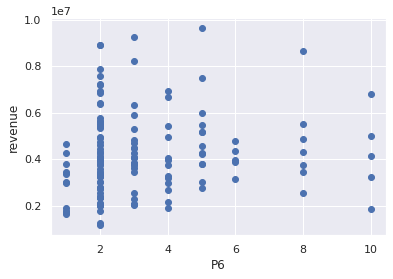

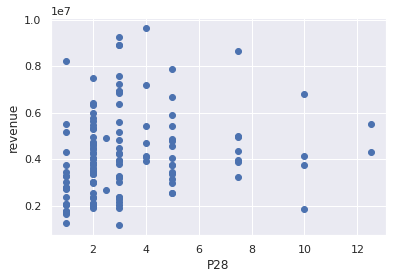

In [207]:
plt.figure(1)
plt.xlabel("P2")
plt.ylabel("revenue")
plt.scatter(train_data["P2"],train_data["revenue"])
plt.figure(2)
plt.xlabel("P6")
plt.ylabel("revenue")
plt.scatter(train_data["P6"],train_data["revenue"])
plt.figure(3)
plt.xlabel("P28")
plt.ylabel("revenue")
plt.scatter(train_data["P28"],train_data["revenue"])

In [208]:
train_data.head()

,P2,P6,P28,revenue,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_Other
Id,,,,,,,,,,,,,,,,,
0,5.0,2,2.0,5653753.0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,5.0,2,3.0,6923131.0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,4.0,3,1.0,2055379.0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,4.5,4,2.5,2675511.0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,4.0,2,1.0,4316715.0,0,0,0,0,0,0,0,1,0,1,0,0,1


#3. Model Training

In [209]:
train_data.shape

(134, 17)

dividing 134 rows in 80:20 ratio for X_Train and X_Val
* 80% of 134 -> 107
* 20% of 134 -> 27

In [210]:
Y_Train = train_data["revenue"]
X_Train = train_data.drop(["revenue"],axis=1)

In [211]:
X_Train.head(), X_Train.shape

(     P2  P6  P28  City_İstanbul  ...  City Group_Other  Type_DT  Type_FC  Type_Other
 Id                               ...                                                
 0   5.0   2  2.0              1  ...                 0        0        0           1
 1   5.0   2  3.0              0  ...                 0        0        1           0
 2   4.0   3  1.0              0  ...                 1        0        0           1
 3   4.5   4  2.5              0  ...                 1        0        0           1
 4   4.0   2  1.0              0  ...                 1        0        0           1
 
 [5 rows x 16 columns], (134, 16))

In [212]:
Y_Train.head(), Y_Train.shape

(Id
 0    5653753.0
 1    6923131.0
 2    2055379.0
 3    2675511.0
 4    4316715.0
 Name: revenue, dtype: float64, (134,))

In [213]:
import tensorflow as tf

In [214]:
X_Train_Tensor = tf.constant(X_Train)
X_Train_Tensor

<tf.Tensor: shape=(134, 16), dtype=float64, numpy=
array([[5., 2., 2., ..., 0., 0., 1.],
       [5., 2., 3., ..., 0., 1., 0.],
       [4., 3., 1., ..., 0., 0., 1.],
       ...,
       [4., 3., 2., ..., 0., 1., 0.],
       [5., 2., 3., ..., 0., 1., 0.],
       [5., 2., 3., ..., 0., 1., 0.]])>

In [215]:
Y_Train_Tensor = tf.constant(Y_Train)
Y_Train_Tensor

<tf.Tensor: shape=(134,), dtype=float64, numpy=
array([5653753., 6923131., 2055379., 2675511., 4316715., 5017319.,
       5166635., 4491607., 4952497., 5444227., 3745135., 5161370.,
       1734634., 4807746., 1999097., 3218918., 8213524., 5337526.,
       2021934., 5525735., 1149870., 3956086., 2999068., 8904084.,
       3778621., 2267425., 5435276., 4705945., 3447890., 3008199.,
       2058644., 3261924., 2371202., 4100886., 3903884., 3028267.,
       2740687., 5461700., 3818055., 6836483., 4554237., 4952255.,
       2732645., 4264176., 3752885., 4250758., 7865428., 7201784.,
       8630682., 2156098., 3273041., 1763231., 5595267., 4651866.,
       6941173., 2390534., 3258837., 3004429., 3600467., 3164972.,
       4350573., 5286212., 1619683., 2551252., 1756069., 1882131.,
       4052733., 3836721., 3452382., 3982767., 4136425., 2525375.,
       3347767., 5500818., 4590423., 1904842., 3871344., 6313221.,
       3727364., 4066618., 3807496., 5966193., 4250553., 7495092.,
       3351383

In [216]:
Y_Train_Tensor = tf.reshape(Y_Train_Tensor,shape=(134,1))
Y_Train_Tensor

<tf.Tensor: shape=(134, 1), dtype=float64, numpy=
array([[5653753.],
       [6923131.],
       [2055379.],
       [2675511.],
       [4316715.],
       [5017319.],
       [5166635.],
       [4491607.],
       [4952497.],
       [5444227.],
       [3745135.],
       [5161370.],
       [1734634.],
       [4807746.],
       [1999097.],
       [3218918.],
       [8213524.],
       [5337526.],
       [2021934.],
       [5525735.],
       [1149870.],
       [3956086.],
       [2999068.],
       [8904084.],
       [3778621.],
       [2267425.],
       [5435276.],
       [4705945.],
       [3447890.],
       [3008199.],
       [2058644.],
       [3261924.],
       [2371202.],
       [4100886.],
       [3903884.],
       [3028267.],
       [2740687.],
       [5461700.],
       [3818055.],
       [6836483.],
       [4554237.],
       [4952255.],
       [2732645.],
       [4264176.],
       [3752885.],
       [4250758.],
       [7865428.],
       [7201784.],
       [8630682.],
       [2156098.],


In [217]:
tf.random.set_seed(42)

In [218]:
X_Train_Tensor.shape

TensorShape([134, 16])

In [219]:
model = tf.keras.Sequential([tf.keras.layers.Dense(16,input_shape=(16,),activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(32,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(32,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(32,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(13,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(16,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(16,activation='relu',activity_regularizer=tf.keras.regularizers.L1(0.01)),
                             tf.keras.layers.Dense(1,activation=None)
                            ])

In [220]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.mse
)

In [221]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_57 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_58 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_59 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_60 (Dense)             (None, 13)                429       
_________________________________________________________________
dense_61 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_62 (Dense)             (None, 16)              

In [222]:
history = model.fit(X_Train_Tensor,Y_Train_Tensor,batch_size=128,epochs=2000,validation_split = 0.2)

Epoch 1/2000
1/1 [==============================] - 1s 947ms/step - loss: 20167566295040.0000 - val_loss: 22804078526464.0000
Epoch 2/2000
1/1 [==============================] - 0s 22ms/step - loss: 20167566295040.0000 - val_loss: 22804078526464.0000
Epoch 3/2000
1/1 [==============================] - 0s 23ms/step - loss: 20167564197888.0000 - val_loss: 22804078526464.0000
Epoch 4/2000
1/1 [==============================] - 0s 21ms/step - loss: 20167566295040.0000 - val_loss: 22804076429312.0000
Epoch 5/2000
1/1 [==============================] - 0s 20ms/step - loss: 20167564197888.0000 - val_loss: 22804076429312.0000
Epoch 6/2000
1/1 [==============================] - 0s 23ms/step - loss: 20167562100736.0000 - val_loss: 22804076429312.0000
Epoch 7/2000
1/1 [==============================] - 0s 22ms/step - loss: 20167562100736.0000 - val_loss: 22804076429312.0000
Epoch 8/2000
1/1 [==============================] - 0s 19ms/step - loss: 20167562100736.0000 - val_loss: 22804076429312.0000

In [223]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,val_loss,epoch
0,2.016757e+13,2.280408e+13,0
1,2.016757e+13,2.280408e+13,1
2,2.016756e+13,2.280408e+13,2
3,2.016757e+13,2.280408e+13,3
4,2.016756e+13,2.280408e+13,4


In [224]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [revenue]')
  plt.legend()
  plt.grid(True)

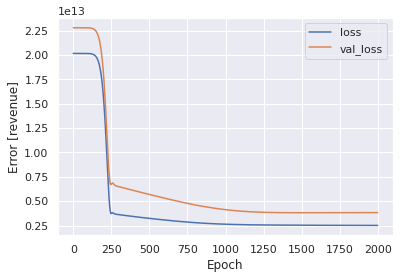

In [225]:
plot_loss(history)

### Let's visualize how much difference is there between Observed values and Predicted Values. 


In [226]:
Y_Pred = model.predict(X_Train_Tensor)

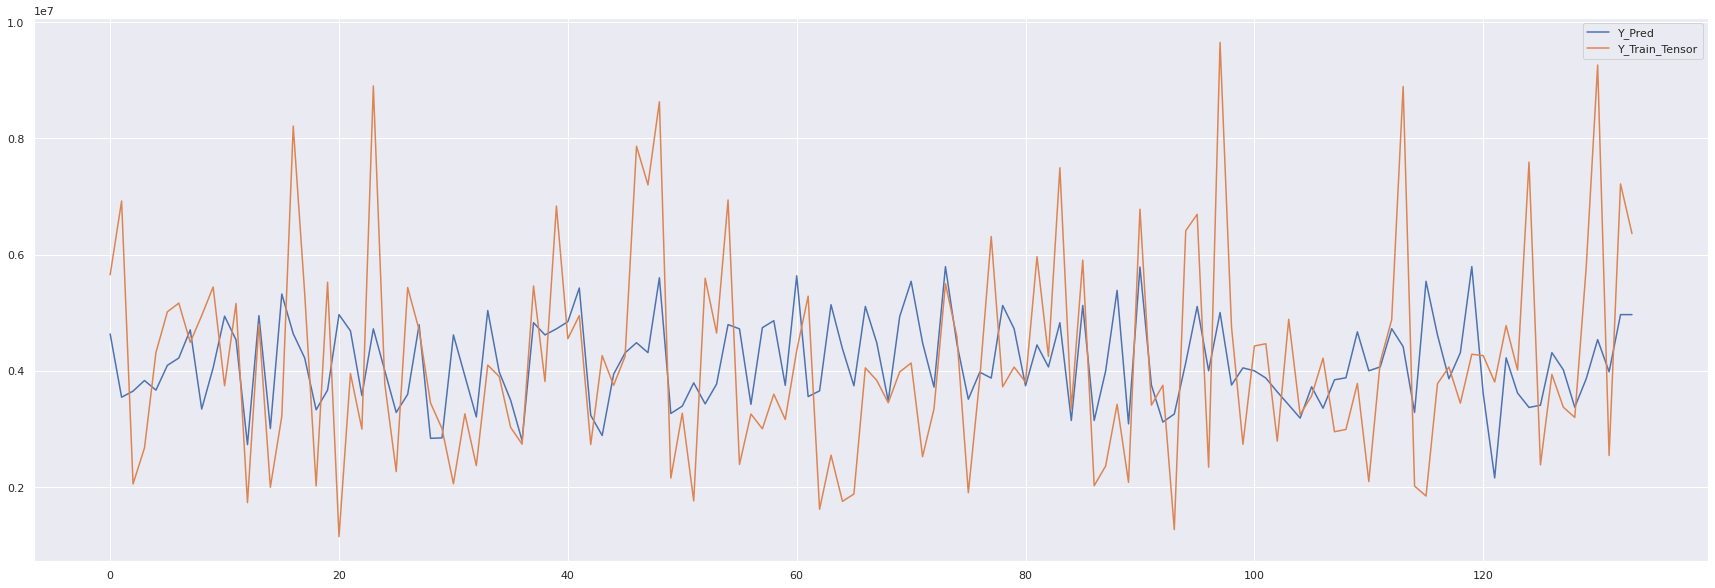

In [227]:
plt.figure(figsize=(30,10))
plt.plot(Y_Pred)
plt.plot(Y_Train_Tensor)
plt.legend(["Y_Pred","Y_Train_Tensor"])


In [245]:
test_data = pd.read_csv('/content/test/test.csv',index_col=0)
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


# Preprocessing Test data for getting predictions 

In [246]:
# one hot encoding all the major cities (where no. of restaurants are more than 3)
city_encodings = pd.get_dummies(test_data[["City"]], prefix = ['City'])
city_encodings["City_Other"] = 0
for index, rows in city_encodings.iterrows():
    if (rows["City_İstanbul"] == 0 and rows["City_Ankara"] == 0 and rows["City_İzmir"] == 0 and rows["City_Bursa"] == 0 and rows["City_Samsun"] == 0 and rows["City_Antalya"] == 0 and rows["City_Sakarya"] == 0):
        city_encodings["City_Other"][index] = 1

# chosing essential groups i.e [Cities with no. of restaurants > 3 and Other (with no. of restaurants < 3)] 
city_encodings = city_encodings[["City_İstanbul", "City_Ankara", "City_İzmir", "City_Bursa", "City_Samsun", "City_Antalya", "City_Sakarya", "City_Other"]]
city_encodings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other
Id,,,,,,,,
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,1,0,0
99996,0,0,0,0,0,0,0,1
99997,1,0,0,0,0,0,0,0


In [247]:
test_data = pd.merge(test_data, city_encodings, left_index = True, right_index = True)

In [248]:
# one hot encoding City Groups
city_group_encodings = pd.get_dummies(test_data[["City Group"]], prefix = ['City Group'])
city_group_encodings

,City Group_Big Cities,City Group_Other
Id,,
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
99995,0,1
99996,0,1
99997,1,0


In [249]:
test_data = pd.merge(test_data, city_group_encodings, left_index = True, right_index = True)

In [250]:
test_data.drop(["City Group"], axis=1,inplace=True)

In [251]:
type_encodings = pd.get_dummies(test_data[["Type"]], prefix = ['Type'])
type_encodings["Type_Other"] = 0
for index, rows in type_encodings.iterrows():
    if (rows["Type_DT"] == 0 and rows["Type_FC"] == 0):
        type_encodings["Type_Other"][index] = 1
type_encodings = type_encodings[["Type_DT","Type_FC","Type_Other"]]
type_encodings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Type_DT,Type_FC,Type_Other
Id,,,
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
99995,0,1,0
99996,0,0,1
99997,0,0,1


In [252]:
test_data = pd.merge(test_data, type_encodings, left_index = True, right_index = True)

In [253]:
test_data.drop(["Type"], axis=1,inplace=True)

In [254]:
test_data.head()

,Open Date,City,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_Other
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,03/18/2011,Konya,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,10/30/2013,Ankara,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,05/06/2013,Kocaeli,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,07/31/2013,Afyonkarahisar,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [255]:
test_data.drop(["City","Open Date"],axis=1,inplace=True)

In [256]:
test_data.drop(["P1","P3","P4","P5","P7",	"P8",	"P9",	"P10",	"P11",	"P12",	"P13",	"P14",	"P15",	"P16",	"P17",	"P18",	"P19",	"P20",	"P21",	"P22",	"P23",	"P24",	"P25","P26","P27","P29",	"P30",	"P31",	"P32",	"P33",	"P34",	"P35",	"P36",	"P37"],axis=1,inplace=True)

In [257]:
test_data.head()

,P2,P6,P28,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_Other
Id,,,,,,,,,,,,,,,,
0,4.0,2,2.0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,4.0,2,1.0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,4.0,2,2.0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,4.0,3,2.0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,4.0,2,5.0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [258]:
test_data.shape

(100000, 16)

In [259]:
X_Test_Tensor = tf.constant(test_data)

In [260]:
X_Test_Tensor.shape

TensorShape([100000, 16])

In [261]:
Y_Predictions = model.predict(X_Test_Tensor)

In [264]:
Y_Predictions

array([[4002328.2],
       [3669830.8],
       [3322793.8],
       ...,
       [4811370.5],
       [5671897. ],
       [4898784.5]], dtype=float32)

In [269]:
test_data["Predictions"] = Y_Predictions

In [270]:
test_data.head()

,P2,P6,P28,City_İstanbul,City_Ankara,City_İzmir,City_Bursa,City_Samsun,City_Antalya,City_Sakarya,City_Other,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_Other,Predictions
Id,,,,,,,,,,,,,,,,,
0,4.0,2,2.0,0,0,0,0,0,0,0,1,0,1,0,1,0,4002328.25
1,4.0,2,1.0,0,0,0,0,0,0,0,1,0,1,0,0,1,3669830.75
2,4.0,2,2.0,0,1,0,0,0,0,0,0,1,0,0,1,0,3322793.75
3,4.0,3,2.0,0,0,0,0,0,0,0,1,0,1,0,0,1,3740068.25
4,4.0,2,5.0,0,0,0,0,0,0,0,1,0,1,0,1,0,4264570.00


In [275]:
submit_dataFrame = test_data[["Predictions"]]
# submit_dataFrame["Id"] = test_data.index
# submit_dataFrame["Prediction"] = Y_Predictions.reshape(100000,)
print(submit_dataFrame)
submit_dataFrame.to_csv("submission.csv")

       Predictions
Id                
0       4002328.25
1       3669830.75
2       3322793.75
3       3740068.25
4       4264570.00
...            ...
99995   3647110.50
99996   3411929.75
99997   4811370.50
99998   5671897.00
99999   4898784.50

[100000 rows x 1 columns]
